In [1]:
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load historical stock data
aapl_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
amzn_data = pd.read_csv('../data/yfinance_data/AMZN_historical_data.csv')
goog_data = pd.read_csv('../data/yfinance_data/GOOG_historical_data.csv')
meta_data = pd.read_csv('../data/yfinance_data/META_historical_data.csv')
msft_data = pd.read_csv('../data/yfinance_data/MSFT_historical_data.csv')
nvda_data = pd.read_csv('../data/yfinance_data/NVDA_historical_data.csv')
tsla_data = pd.read_csv('../data/yfinance_data/TSLA_historical_data.csv')

In [4]:
print("shape of appl:", aapl_data.shape)
print("shape of amzn:", amzn_data.shape)
print("shape of goog:", goog_data.shape)
print("shape of meta:", meta_data.shape)
print("shape of msft:", msft_data.shape)
print("shape of nvda:", nvda_data.shape)
print("shape of tsla:", tsla_data.shape)

shape of appl: (10998, 9)
shape of amzn: (6846, 9)
shape of goog: (5020, 9)
shape of meta: (2926, 9)
shape of msft: (9672, 9)
shape of nvda: (6421, 9)
shape of tsla: (3545, 9)


In [5]:
aapl_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [6]:
amzn_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [7]:
goog_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [8]:
meta_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [9]:
msft_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [10]:
nvda_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


In [11]:
tsla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [12]:
# Ensure the date column is in datetime format
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])
aapl_data.set_index('Date', inplace=True)

In [13]:
# Ensure the date column is in datetime format
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_data.set_index('Date', inplace=True)

In [14]:
# Ensure the date column is in datetime format
goog_data['Date'] = pd.to_datetime(goog_data['Date'])
goog_data.set_index('Date', inplace=True)

In [15]:
# Ensure the date column is in datetime format
meta_data['Date'] = pd.to_datetime(meta_data['Date'])
meta_data.set_index('Date', inplace=True)

In [16]:
# Ensure the date column is in datetime format
msft_data['Date'] = pd.to_datetime(msft_data['Date'])
msft_data.set_index('Date', inplace=True)

In [17]:
# Ensure the date column is in datetime format
nvda_data['Date'] = pd.to_datetime(nvda_data['Date'])
nvda_data.set_index('Date', inplace=True)

In [18]:
# Ensure the date column is in datetime format
tsla_data['Date'] = pd.to_datetime(tsla_data['Date'])
tsla_data.set_index('Date', inplace=True)

In [19]:
# Moving Averages
aapl_data['SMA_20'] = talib.SMA(aapl_data['Close'], timeperiod=20)
aapl_data['SMA_50'] = talib.SMA(aapl_data['Close'], timeperiod=50)

# RSI
aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)

# MACD
macd, macdsignal, macdhist = talib.MACD(aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
aapl_data['MACD'] = macd
aapl_data['MACD_Signal'] = macdsignal
aapl_data['MACD_Hist'] = macdhist

In [20]:
# Fetch historical data for AAPL
stock = yf.Ticker('AAPL')
historical_data = stock.history(start='1980-12-12', end='2024-07-30')

# Display basic statistics
basic_stats = historical_data.describe()
basic_stats

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10997.000000,10997.000000,10997.000000,10997.000000,1.099700e+04,10997.000000,10997.000000
mean,21.463009,21.694156,21.241523,21.476578,3.181058e+08,0.000752,0.001546
std,45.491340,45.978529,45.034464,45.525218,3.354572e+08,0.011754,0.083667
min,0.038287,0.038287,0.037857,0.037857,0.000000e+00,0.000000,0.000000
25%,0.241731,0.246591,0.237079,0.241766,1.132548e+08,0.000000,0.000000
50%,0.430682,0.437525,0.423733,0.432079,2.057664e+08,0.000000,0.000000
75%,17.285700,17.394380,17.118607,17.252329,3.985408e+08,0.000000,0.000000
max,236.206595,236.955728,232.820515,234.548523,7.421641e+09,0.250000,7.000000


In [21]:
# Calculate the 50-day moving average
historical_data['50_MA'] = talib.SMA(historical_data['Close'], timeperiod=50)

# Calculate the RSI (Relative Strength Index) for a 14-day period
historical_data['RSI'] = talib.RSI(historical_data['Close'], timeperiod=14)

# Display the basic statistics and the first few rows of the DataFrame with the new columns
print(basic_stats)
print(historical_data.head())

               Open          High           Low         Close        Volume  \
count  10997.000000  10997.000000  10997.000000  10997.000000  1.099700e+04   
mean      21.463009     21.694156     21.241523     21.476578  3.181058e+08   
std       45.491340     45.978529     45.034464     45.525218  3.354572e+08   
min        0.038287      0.038287      0.037857      0.037857  0.000000e+00   
25%        0.241731      0.246591      0.237079      0.241766  1.132548e+08   
50%        0.430682      0.437525      0.423733      0.432079  2.057664e+08   
75%       17.285700     17.394380     17.118607     17.252329  3.985408e+08   
max      236.206595    236.955728    232.820515    234.548523  7.421641e+09   

          Dividends  Stock Splits  
count  10997.000000  10997.000000  
mean       0.000752      0.001546  
std        0.011754      0.083667  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


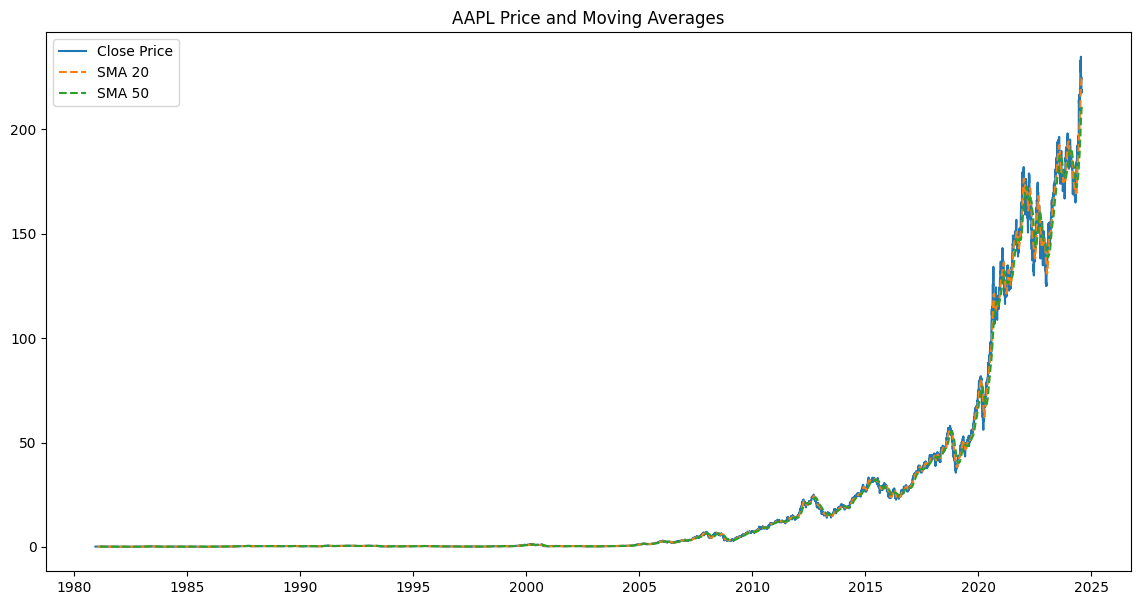

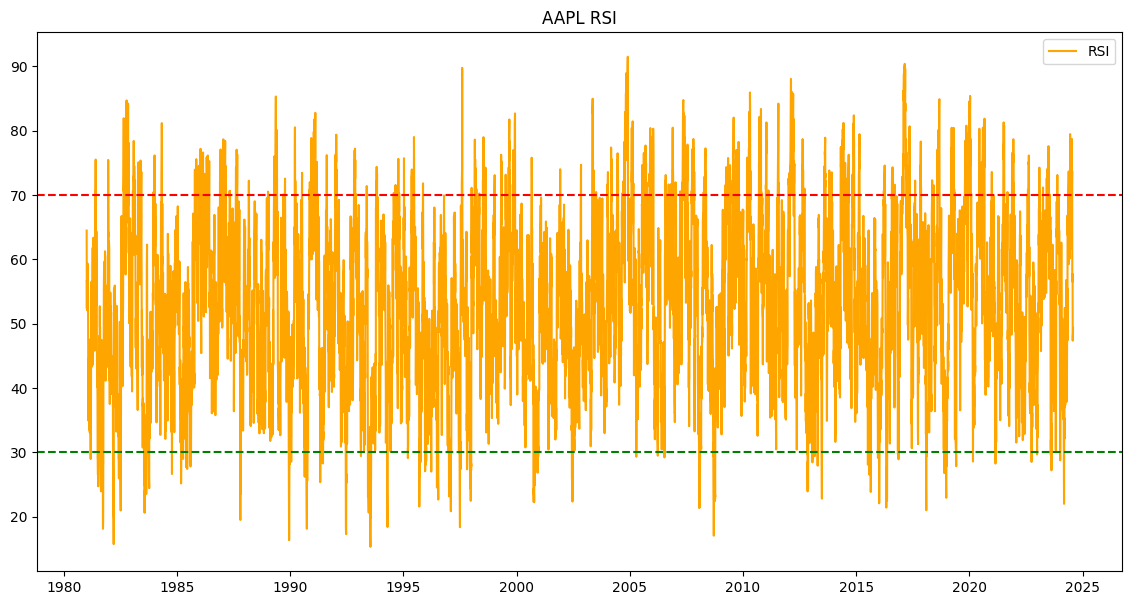

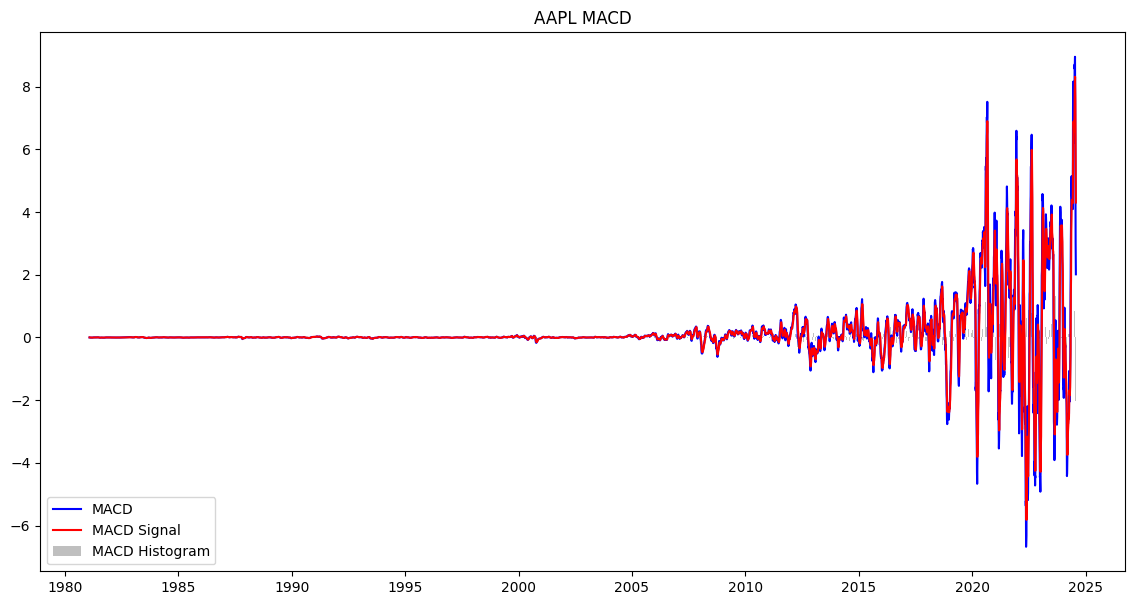

In [22]:
# Plot stock price and moving averages
plt.figure(figsize=(14,7))
plt.plot(aapl_data['Close'], label='Close Price')
plt.plot(aapl_data['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(aapl_data['SMA_50'], label='SMA 50', linestyle='--')
plt.title('AAPL Price and Moving Averages')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14,7))
plt.plot(aapl_data['RSI'], label='RSI', color='orange')
plt.axhline(y=70, linestyle='--', color='red')
plt.axhline(y=30, linestyle='--', color='green')
plt.title('AAPL RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14,7))
plt.plot(aapl_data['MACD'], label='MACD', color='blue')
plt.plot(aapl_data['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(aapl_data.index, aapl_data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title('AAPL MACD')
plt.legend()
plt.show()